In [1]:
from sklearn.ensemble import RandomForestClassifier
from fact.io import read_h5py

exec(open('/home/msackel/Desktop/gammaClassification/programm/theta_cut/theta_cut.py').read())
exec(open('/home/msackel/Desktop/gammaClassification/programm/model_significance/model_significance.py').read())

Tree = RandomForestClassifier(max_depth=15, max_features=7, criterion='entropy', n_estimators=100, n_jobs=10)

with open('/home/msackel/Desktop/gammaClassification/config/feature.yaml') as f:
		feature = yaml.load(f)

eval_data = read_h5py(
				'/home/msackel/Desktop/gammaClassification/data/raw_data/mrk501_2014_precuts.hdf5',
				key='events',
				columns=list(feature) + [
						'theta_deg',
						'theta_deg_off_1',
						'theta_deg_off_2',
						'theta_deg_off_3',
						'theta_deg_off_4',
						'theta_deg_off_5',
						]
				)

print('---Theta**2 = 0.5')
train_data = theta_cut('/home/msackel/Desktop/gammaClassification/data/raw_data/gamma_precuts.hdf5', 
					'/home/msackel/Desktop/gammaClassification/data/raw_data/crab_precuts.hdf5', 0.5) 

Tree.fit(train_data.drop('label', axis=1), train_data.label)

---Theta**2 = 0.5


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=10, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [3]:
pred = Tree.predict_proba(eval_data[feature])

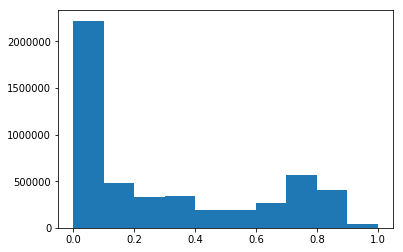

In [9]:
plt.hist(pred[:,1])
plt.show()